In [1]:
import re
import pandas as pd

# 1. Read the data from the text file
filename = "training_output.txt"

try:
    with open(filename, "r") as f:
        log_data = f.read()
except FileNotFoundError:
    print(
        f"Error: The file '{filename}' was not found. Please ensure it is in the same directory."
    )
    log_data = ""  # Prevent regex error if file is missing

# 2. Define the Regex Pattern
# Break down:
# Train Loss:\s+([\d\.]+)  -> Finds "Train Loss:", spaces, then captures the number (digits and dots)
# .*?                      -> Matches any characters in between (non-greedy)
# Train Acc:\s+([\d\.]+)   -> Captures Train Acc
# \s+                      -> Matches newlines/whitespace between the Train and Val lines
# Val Loss:\s+([\d\.]+)    -> Captures Val Loss
# .*?                      -> Matches characters in between
# Val Acc:\s+([\d\.]+)     -> Captures Val Acc
pattern = r"Train Loss:\s+([\d\.]+).*?Train Acc:\s+([\d\.]+)\s+Val Loss:\s+([\d\.]+).*?Val Acc:\s+([\d\.]+)"

# 3. Extract data using re.findall
# This returns a list of tuples: [('2.7097', '0.130', '2.6980', '0.121'), ...]
matches = re.findall(pattern, log_data)

# 4. Convert to a clean list of dictionaries (Python Array) with floats
parsed_data = []
for i, match in enumerate(matches):
    parsed_data.append(
        {
            "epoch": i + 1,
            "train_loss": float(match[0]),
            "train_acc": float(match[1]),
            "val_loss": float(match[2]),
            "val_acc": float(match[3]),
        }
    )

# Output the simple array
print("--- Python List of Dictionaries ---")
for entry in parsed_data:
    print(entry)

# ---------------------------------------------------------
# OPTIONAL: Convert to Pandas DataFrame (Best for plotting)
# ---------------------------------------------------------
print("\n--- Pandas DataFrame (Easier for Analysis) ---")
df = pd.DataFrame(parsed_data)
print(df)

# Example: Get just the validation accuracies as an array
val_acc_array = df["val_acc"].tolist()
print(f"\nValidation Accuracies only: {val_acc_array}")

--- Python List of Dictionaries ---
{'epoch': 1, 'train_loss': 2.7097, 'train_acc': 0.13, 'val_loss': 2.698, 'val_acc': 0.121}
{'epoch': 2, 'train_loss': 2.6291, 'train_acc': 0.162, 'val_loss': 2.6867, 'val_acc': 0.118}
{'epoch': 3, 'train_loss': 2.5928, 'train_acc': 0.171, 'val_loss': 2.6852, 'val_acc': 0.115}
{'epoch': 4, 'train_loss': 2.5721, 'train_acc': 0.173, 'val_loss': 2.6908, 'val_acc': 0.119}
{'epoch': 5, 'train_loss': 2.5594, 'train_acc': 0.179, 'val_loss': 2.6972, 'val_acc': 0.107}
{'epoch': 6, 'train_loss': 2.5508, 'train_acc': 0.18, 'val_loss': 2.7032, 'val_acc': 0.115}
{'epoch': 7, 'train_loss': 2.545, 'train_acc': 0.178, 'val_loss': 2.7104, 'val_acc': 0.106}
{'epoch': 8, 'train_loss': 2.5405, 'train_acc': 0.181, 'val_loss': 2.716, 'val_acc': 0.102}
{'epoch': 9, 'train_loss': 2.5374, 'train_acc': 0.179, 'val_loss': 2.7198, 'val_acc': 0.105}
{'epoch': 10, 'train_loss': 2.535, 'train_acc': 0.181, 'val_loss': 2.7248, 'val_acc': 0.103}
{'epoch': 11, 'train_loss': 2.5332, 'tr

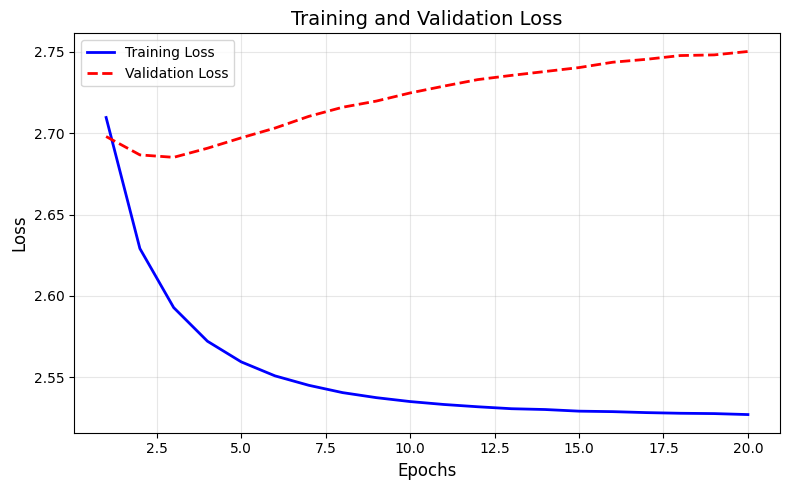

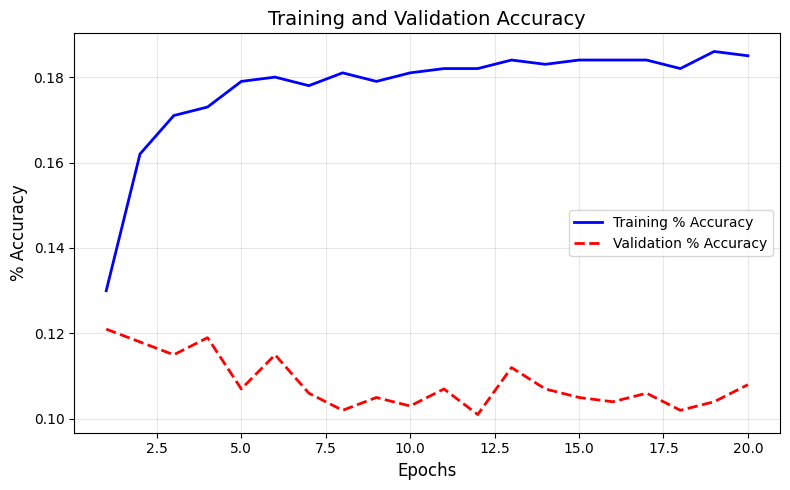

In [2]:
from utils import plot_metric

train_loss = df["train_loss"].tolist()
val_loss = df["val_loss"].tolist()

train_acc = df["train_acc"].tolist()
val_acc = df["val_acc"].tolist()

plot_metric(train_loss, val_loss, "Training and Validation Loss", ylabel="Loss")
plot_metric(train_acc, val_acc, "Training and Validation Accuracy", ylabel="% Accuracy")